In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Dataset

In [ ]:
df_user_path = '/content/drive/MyDrive/Twibot-20/dataframes/processed_dataset.pickle'
df_user = pd.read_pickle(df_user_path)

In [ ]:
print(df_user.columns)

Index(['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'verified',
       'label', 'Number', 'RT', 'Links_mean', 'Links_std', 'Hashtags_mean',
       'Hashtags_std', 'Mentions_mean', 'Mentions_std', 'Words_mean',
       'Words_std'],
      dtype='object')


In [ ]:
df_user = df_user.drop('Number', axis = 1)
df_user = df_user.drop('verified', axis = 1)
print(df_user.columns)

Index(['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'label',
       'RT', 'Links_mean', 'Links_std', 'Hashtags_mean', 'Hashtags_std',
       'Mentions_mean', 'Mentions_std', 'Words_mean', 'Words_std'],
      dtype='object')


# Use Random Forest to Predict Human or Bot

## Split train and test

In [ ]:
TRAIN_SPLIT = 0.7
stop_point = int(len(df_user)*TRAIN_SPLIT)
df_train = df_user.iloc[:stop_point]
df_test = df_user.iloc[stop_point:]

df_train.head()

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,label,RT,Links_mean,Links_std,Hashtags_mean,Hashtags_std,Mentions_mean,Mentions_std,Words_mean,Words_std
u17461978,15349596.0,692.0,9798.0,45568.0,human,4,1.102041,0.762512,0.408163,0.568506,1.938776,1.845106,24.204082,14.222689
u17685258,762839.0,475.0,5518.0,3201.0,human,32,0.540000,0.537029,0.200000,0.400000,0.920000,0.594643,14.220000,8.683985
u15750898,327587.0,4801.0,192876.0,1744.0,human,19,0.900000,0.574456,0.420000,0.873842,0.520000,0.670522,24.340000,9.733674
u1659167666,13324.0,647.0,103.0,44.0,bot,28,0.740000,0.438634,0.040000,0.195959,0.720000,0.800999,12.040000,5.946293
u34743251,12601567.0,96.0,4879.0,26952.0,human,13,0.980000,0.647765,0.040000,0.195959,0.960000,1.264278,15.580000,9.701732


In [ ]:
train_features = df_train.drop(['label'], axis=1)
train_labels = df_train['label']

test_features = df_test.drop('label', axis=1)
test_labels = df_test['label']
train_labels

u17461978              human
u17685258              human
u15750898              human
u1659167666              bot
u34743251              human
                       ...  
u305301343               bot
u1630890068            human
u713519580757536769      bot
u93345260                bot
u1749309397              bot
Name: label, Length: 8222, dtype: object

## Function to Train on Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def train_and_pred(model):

  print('Training...' + str(model))
  # fit model
  model.fit(train_features, train_labels)

  test_pred = model.predict(test_features)

  # get accuracy
  accuracy = accuracy_score(test_labels, test_pred)
  print('accuracy: %f' % accuracy)

  # get precision
  precision = precision_score(test_labels, test_pred, pos_label="bot")
  print('precision: %f' % precision)

  # get recall
  recall = recall_score(test_labels, test_pred, pos_label="bot")
  print('recall: %f' % recall)

  # get f1
  f1 = f1_score(test_labels, test_pred, pos_label="bot")
  print('f1: %f' % f1)
   
  return {'accuracy': accuracy,'precision' : precision, 'recall': recall, 'f1':f1}

## Train and test here for accuracy

In [ ]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}
accuracies = {model: 0 for model in models}
for model in models:
  accuracies[model] = train_and_pred(models[model])

# testing_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# accuracies = {estimator: 0 for estimator in testing_estimators}
# for estimators in testing_estimators:
#   model = AdaBoostClassifier(n_estimators=estimators)
#   accuracies[estimators] = train_and_pred(model)
accuracies

Training...RandomForestClassifier()
accuracy: 0.769296
precision: 0.755952
recall: 0.854997
f1: 0.802430
Training...AdaBoostClassifier()
accuracy: 0.761067
precision: 0.735205
recall: 0.881409
f1: 0.801696
Training...DecisionTreeClassifier()
accuracy: 0.686720
precision: 0.716606
recall: 0.708441
f1: 0.712500
Training...MLPClassifier()
accuracy: 0.627412
precision: 0.698842
recall: 0.562403
f1: 0.623242
Training...KNeighborsClassifier()
accuracy: 0.711124
precision: 0.708924
recall: 0.802175
f1: 0.752672


{'RandomForestClassifier': {'accuracy': 0.7692962542565267,
  'precision': 0.7559523809523809,
  'recall': 0.8549974106680477,
  'f1': 0.8024301336573512},
 'AdaBoostClassifier': {'accuracy': 0.761066969353008,
  'precision': 0.7352051835853132,
  'recall': 0.8814085965820818,
  'f1': 0.801695713612812},
 'DecisionTreeClassifier': {'accuracy': 0.6867196367763905,
  'precision': 0.7166055526453641,
  'recall': 0.7084412221646815,
  'f1': 0.7125000000000001},
 'MLPClassifier': {'accuracy': 0.6274120317820658,
  'precision': 0.6988416988416989,
  'recall': 0.5624029000517866,
  'f1': 0.6232424677187949},
 'KNeighborsClassifier': {'accuracy': 0.7111237230419978,
  'precision': 0.7089244851258582,
  'recall': 0.8021750388399793,
  'f1': 0.7526724975704566}}

### Plot results of training

In [ ]:
data = accuracies

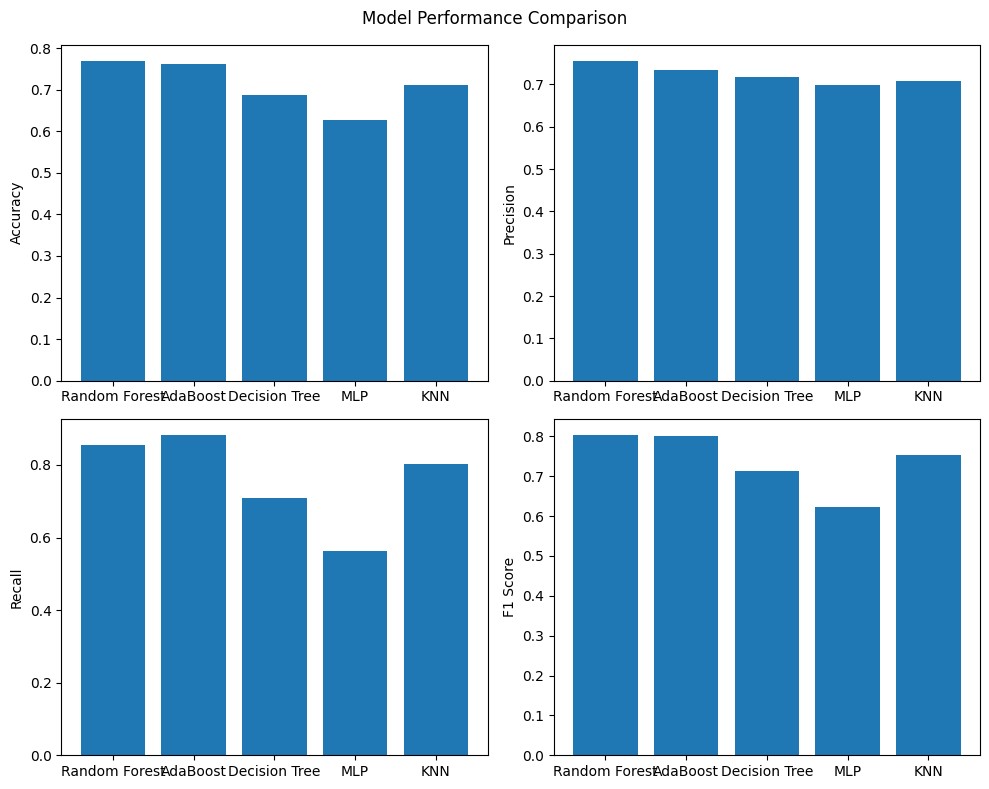

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for each model
models = list(data.keys())
accuracy = [data[model]['accuracy'] for model in models]
precision = [data[model]['precision'] for model in models]
recall = [data[model]['recall'] for model in models]
f1 = [data[model]['f1'] for model in models]

# Set the x-axis labels and positions
labels = ['Random Forest', 'AdaBoost', 'Decision Tree', 'MLP', 'KNN']
x_pos = np.arange(len(labels))

# Create the subplots for each metric
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Accuracy plot
axs[0, 0].bar(x_pos, accuracy)
axs[0, 0].set_xticks(x_pos)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')

# Precision plot
axs[0, 1].bar(x_pos, precision)
axs[0, 1].set_xticks(x_pos)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')

# Recall plot
axs[1, 0].bar(x_pos, recall)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')

# F1 plot
axs[1, 1].bar(x_pos, f1)
axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')

# Set the title and layout
fig.suptitle('Model Performance Comparison')
fig.tight_layout()

# Show the plot
plt.show()

#Feature Importances

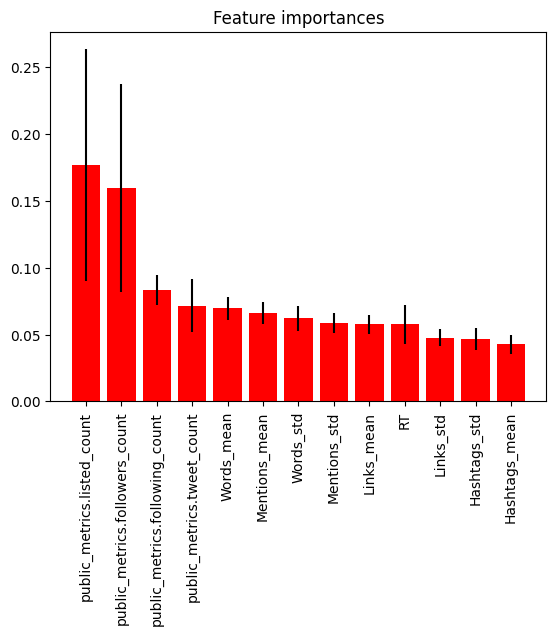

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_features, train_labels)
test_pred = rfc.predict(test_features)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), train_features.columns[indices], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.show()
